# Monte Carlo Prediction
- Algorithms from ```pp. 76 - 78``` in Sutton & Barto 2017
- Estimates state-value function $ V \approx v_\pi $ for a given policy $ \pi $

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn

from gridWorldEnvironment import GridWorld

In [43]:
# creating gridworld environment
gw = GridWorld(gamma = .9, theta = .5)

### Generate random episode
- For Monte Carlo methods, random episodes from starting state to terminal state should be generated in advance
    - Random episode below follows equiprobable random policy (i.e., same probabilities for each action)

In [59]:
def generate_random_episode(env):
    episode = []
    done = False
    current_state = np.random.choice(env.states)
    episode.append((current_state, -1))
    while not done:
        action = np.random.choice(env.actions)
        next_state, reward = gw.state_transition(current_state, action)
        episode.append((next_state, reward))
        if next_state == 0:
            done = True
        current_state = next_state
    return episode

In [60]:
generate_random_episode(gw)

[(5, -1),
 (9, -1),
 (8, -1),
 (12, -1),
 (13, -1),
 (9, -1),
 (5, -1),
 (9, -1),
 (5, -1),
 (9, -1),
 (5, -1),
 (9, -1),
 (13, -1),
 (14, -1),
 (0, -1)]

### Create and initialize value array
- Values in indices 0 and -1 are for terminal states ```((0,0)``` and ```(3,3))```

In [63]:
def value_array(env):
    return np.zeros(len(env.states)+2)

### First-visit MC Prediction
- Estimates $v_\pi(s)$ as the average of the returns following first visit to $s$
    - Most widely studied (from 1940s)

In [90]:
def first_visit_mc(env, num_iter):
    values = value_array(env)
    returns = dict()
    for state in env.states:
        returns[state] = list()
    
    for i in range(num_iter):
        episode = generate_random_episode(env)
        already_visited = set({0})   # also exclude terminal state (0)
        for s, r in episode:
            if s not in already_visited:
                already_visited.add(s)
                idx = episode.index((s, r))
                G = 0
                j = 1
                while j + idx < len(episode):
                    G = env.gamma * (G + episode[j + idx][1])
                    j += 1
                returns[s].append(G)
                values[s] = np.mean(returns[s])
    return values, returns            

In [1]:
%%time
values, returns = first_visit_mc(gw, 10000)

In [92]:
# obtained values
values

array([ 0.        , -4.72154148, -6.40347919, -6.88012429, -4.6794661 ,
       -5.91059736, -6.44069098, -6.46420059, -6.40331047, -6.44837602,
       -5.94160322, -4.78286142, -6.90203822, -6.41543341, -4.71824484,  0.        ])

### Visualizing values
- Visualizing values in table
    - lighter color in table means higher value for random policy

In [93]:
def show_values(values):
    values = values.reshape(4,4)
    ax = seaborn.heatmap(values, cmap = "Blues_r", annot = True, linecolor="#282828", linewidths = 0.1)
    plt.show()

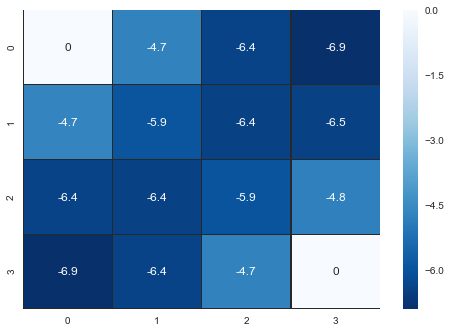

In [94]:
show_values(values)

### Every-visit MC Prediction
- Simply averages the returns following all visits to $s$

In [96]:
def every_visit_mc(env, num_iter):
    values = value_array(env)
    returns = dict()
    for state in env.states:
        returns[state] = list()
    
    for i in range(num_iter):
        episode = generate_random_episode(env)
        for s, r in episode:
            if s != 0:    # exclude terminal state (0)
                idx = episode.index((s, r))
                G = 0
                j = 1
                while j + idx < len(episode):
                    G = env.gamma * (G + episode[j + idx][1])
                    j += 1
                returns[s].append(G)
                values[s] = np.mean(returns[s])
    return values, returns

In [97]:
%%time
values, returns = every_visit_mc(gw, 10000)

Wall time: 39.4 s


In [98]:
# obtained values
values

array([ 0.        , -5.92897574, -7.4409083 , -7.75297674, -5.97437727,
       -7.08216599, -7.52697816, -7.42867667, -7.46986881, -7.51456346,
       -7.04226959, -5.88215225, -7.7499684 , -7.45466395, -5.85762017,  0.        ])

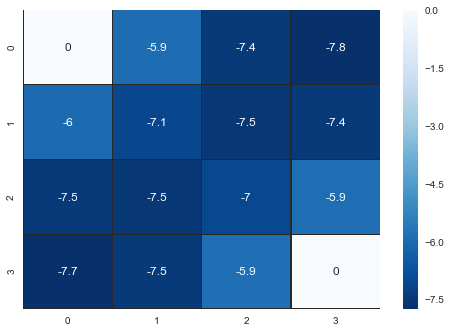

In [99]:
show_values(values)